In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/plsdontkillme/emnist/EMNIST/raw/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/d/plsdontkillme/emnist/EMNIST/raw/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/d/plsdontkillme/emnist/EMNIST/raw/emnist-letters-test-labels-idx1-ubyte
/kaggle/input/d/plsdontkillme/emnist/EMNIST/raw/emnist-byclass-train-images-idx3-ubyte
/kaggle/input/d/plsdontkillme/emnist/EMNIST/raw/emnist-byclass-test-images-idx3-ubyte
/kaggle/input/d/plsdontkillme/emnist/EMNIST/raw/emnist-mnist-train-images-idx3-ubyte
/kaggle/input/d/plsdontkillme/emnist/EMNIST/raw/emnist-digits-train-labels-idx1-ubyte
/kaggle/input/d/plsdontkillme/emnist/EMNIST/raw/emnist-bymerge-test-images-idx3-ubyte
/kaggle/input/d/plsdontkillme/emnist/EMNIST/raw/emnist-bymerge-test-labels-idx1-ubyte
/kaggle/input/d/plsdontkillme/emnist/EMNIST/raw/emnist-mnist-test-labels-idx1-ubyte
/kaggle/input/d/plsdontkillme/emnist/EMNIST/raw/emnist-balanced-test-labels-idx1-ubyte
/kaggle/input/d/plsdontkillme/emnist/EMNIST/raw/emnist-

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')


In [ ]:
from tensorflow.keras.utils import to_categorical


x_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(train_df.iloc[:, 0].values, 10)

x_test = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_test = to_categorical(test_df.iloc[:, 0].values, 10)


2025-07-03 09:10:23.097834: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751533823.331975      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751533823.402545      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


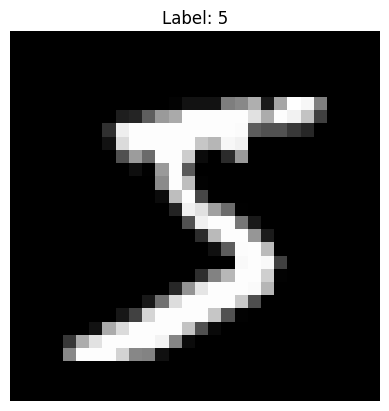

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title("Label: " + str(np.argmax(y_train[0])))
plt.axis('off')
plt.show()


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:
model = Sequential([
    
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    
    MaxPooling2D((2, 2)),


    Conv2D(64, (3, 3), activation='relu'),


    MaxPooling2D((2, 2)),

    
    Flatten(),

    
    Dense(128, activation='relu'),

    
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-03 09:10:38.882136: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.8830 - loss: 0.3872 - val_accuracy: 0.9792 - val_loss: 0.0710
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9827 - loss: 0.0574 - val_accuracy: 0.9852 - val_loss: 0.0518
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9881 - loss: 0.0365 - val_accuracy: 0.9895 - val_loss: 0.0415
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9913 - loss: 0.0268 - val_accuracy: 0.9897 - val_loss: 0.0378
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.9945 - loss: 0.0184 - val_accuracy: 0.9882 - val_loss: 0.0415


In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9864 - loss: 0.0392
Test Accuracy: 0.9902999997138977


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


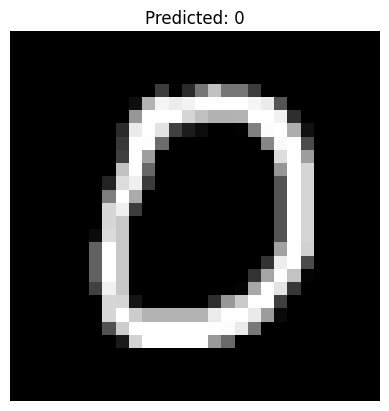

In [10]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(x_test)

# Pick a test image to show
index = 10
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}")
plt.axis('off')
plt.show()


In [11]:
import os

print("Files in EMNIST folder:")
for f in os.listdir("/kaggle/input/emnist"):
    print(f)



Files in EMNIST folder:
emnist-letters-mapping.txt
emnist-letters-test.csv
emnist-mnist-mapping.txt
emnist-digits-train.csv
emnist-bymerge-mapping.txt
emnist-balanced-train.csv
emnist-digits-test.csv
emnist-balanced-test.csv
emnist-mnist-test.csv
emnist-letters-train.csv
emnist-byclass-train.csv
emnist-bymerge-test.csv
emnist-balanced-mapping.txt
emnist-mnist-train.csv
emnist-digits-mapping.txt
emnist-bymerge-train.csv
emnist-byclass-test.csv
emnist_source_files
emnist-byclass-mapping.txt


In [12]:
from scipy.io import loadmat

# Load the EMNIST dataset
mat = loadmat("/kaggle/input/emnistall/emnist-byclass.mat")

# Extract the dataset object
data = mat["dataset"]

# Now extract train and test sets safely
X_train = data["train"][0][0]["images"][0][0]
y_train = data["train"][0][0]["labels"][0][0].flatten()

X_test = data["test"][0][0]["images"][0][0]
y_test = data["test"][0][0]["labels"][0][0].flatten()

print("Training images shape:", X_train.shape)
print("Training labels shape:", y_train.shape)


Training images shape: (697932, 784)
Training labels shape: (697932,)


In [ ]:

X_train = X_train.reshape((-1, 28, 28)).astype("float32") / 255.0
X_test = X_test.reshape((-1, 28, 28)).astype("float32") / 255.0


X_train = np.transpose(X_train, (0, 2, 1))
X_test = np.transpose(X_test, (0, 2, 1))


X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


y_train_cat = to_categorical(y_train, num_classes=62)
y_test_cat = to_categorical(y_test, num_classes=62)


In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(62, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
model.fit(X_train, y_train_cat, batch_size=128, epochs=5, validation_data=(X_test, y_test_cat))


Epoch 1/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 252s 46ms/step - accuracy: 0.7726 - loss: 0.7553 - val_accuracy: 0.8494 - val_loss: 0.4208
Epoch 2/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 235s 43ms/step - accuracy: 0.8554 - loss: 0.4007 - val_accuracy: 0.8607 - val_loss: 0.3830
Epoch 3/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 232s 43ms/step - accuracy: 0.8636 - loss: 0.3665 - val_accuracy: 0.8632 - val_loss: 0.3706
Epoch 4/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 232s 42ms/step - accuracy: 0.8684 - loss: 0.3488 - val_accuracy: 0.8634 - val_loss: 0.3679
Epoch 5/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 231s 42ms/step - accuracy: 0.8729 - loss: 0.3366 - val_accuracy: 0.8652 - val_loss: 0.3620


In [ ]:

mapping = np.genfromtxt('/kaggle/input/emnist/emnist-byclass-mapping.txt', dtype=int)


def label_to_char(label_index):
    return chr(mapping[label_index][1])


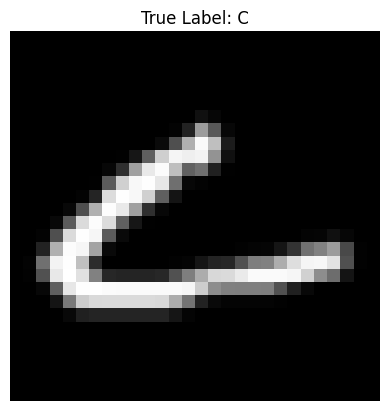

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
✅ Predicted Character: C


In [ ]:

index = 1230


plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title("True Label: " + label_to_char(y_test[index]))
plt.show()


prediction = model.predict(np.expand_dims(X_test[index], axis=0))
predicted_label = np.argmax(prediction)
print("✅ Predicted Character:", label_to_char(predicted_label))
